# Deeper Depth Prediction with Fully Convolutional Residual Networks

By [Iro Laina](http://campar.in.tum.de/Main/IroLaina), [Christian Rupprecht](http://campar.in.tum.de/Main/ChristianRupprecht), [Vasileios Belagiannis](http://www.robots.ox.ac.uk/~vb/), [Federico Tombari](http://campar.in.tum.de/Main/FedericoTombari), [Nassir Navab](http://campar.in.tum.de/Main/NassirNavab).

Modified from predict.py

In [1]:
import argparse
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
import time

import models

## Loading the model

In [2]:
# Path to pre-trained model
model_data_path = "./NYU_ResNet-UpProj.npy"
# Default input size
height = 228
width = 304
channels = 3
batch_size = 1
# Create a placeholder for the input image
input_node = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    
# Construct the network
net = models.ResNet50UpProj({'data': input_node}, batch_size)
    
sess = tf.Session()
    
# Load the converted parameters
start_time = time.time()
print('Loading the model...')
net.load(model_data_path, sess)
    
uninitialized_vars = []
for var in tf.global_variables():
    try:
        sess.run(var)
    except tf.errors.FailedPreconditionError:
        uninitialized_vars.append(var)
            
init_new_vars_op = tf.variables_initializer(uninitialized_vars)
sess.run(init_new_vars_op)
print('Model is ready')
print("--- Model loading time: %s seconds ---" % (time.time() - start_time))

Loading the model...
Model is ready
--- Model loading time: 143.76060271263123 seconds ---


Predict the depth images
------------------------

Reading image
--- Image reading time : 0.3993504047393799 seconds ---
Predicting
--- Predicting time : 1.0450057983398438 seconds ---


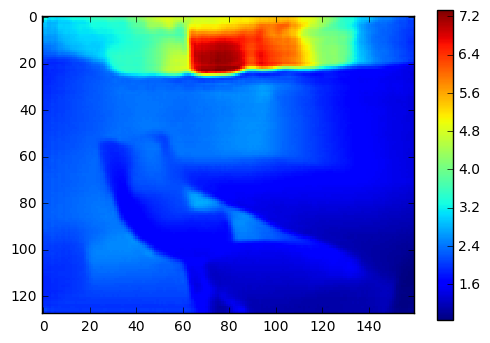

In [3]:
start_time = time.time()
print('Reading image')
# Read image
image_path = "./new_office.jpg"
img = Image.open(image_path)
img = img.resize([width,height], Image.ANTIALIAS)
img = np.array(img).astype('float32')
img = np.expand_dims(np.asarray(img), axis = 0)
print("--- Image reading time : %s seconds ---" % (time.time() - start_time))
print('Predicting')
start_time = time.time()
pred = sess.run(net.get_output(), feed_dict={input_node: img})
print("--- Predicting time : %s seconds ---" % (time.time() - start_time))

# Plot result
fig = plt.figure()
ii = plt.imshow(pred[0,:,:,0], interpolation='nearest')
fig.colorbar(ii)
plt.show()


In [ ]:
sess.close()